In [14]:
import os
import sys
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

from   getdist       import plots, MCSamples 
from   astropy.table import Table

In [15]:
sys.path.append('/global/homes/m/mjwilson/desi/BGS/Sam/DESI/')

In [22]:
from   schechter     import schechter, named_schechter

In [18]:
gama_vmax = Table.read(os.environ['CSCRATCH'] + '/norberg//GAMA4/gama_gold_vmax.fits')
gama_vmax

ZGAMA,ZMIN,ZMAX,MCOLOR_0P0,VMAX,VZ
,,,mag,,
float32,float64,float64,float64,float64,float64
0.19489,0.03903000056743622,0.26298999786376953,-19.896729767108155,7594841.842906503,3213540.202080313
0.1769,0.03903000056743622,0.22304376921442798,-19.345148105394813,4744480.2327530915,2423819.899631298
0.21845,0.03903000056743622,0.26298999786376953,-21.448400924157312,7594841.842906503,4468890.563670888
0.07737,0.03903000056743622,0.11292987662789934,-17.85082186533015,635194.7011307261,189455.44383488595
0.13108,0.03903000056743622,0.26298999786376953,-21.364310026743254,7594841.842906503,998008.3551280069
0.12964,0.03903000056743622,0.20426831744798465,-19.497313354368224,3682207.0915358975,965422.7798028872
0.22188,0.03903000056743622,0.26242798487028474,-20.131056249548763,7548868.367545325,4673684.697095223
0.1052,0.03903000056743622,0.1478515957436512,-18.506521074289658,1429470.252629071,510520.54314400506


In [19]:
gama_lf = Table.read(os.environ['CSCRATCH'] + '/norberg//GAMA4/gama_gold_lumfn.fits')
gama_lf

MEDIAN_M,PHI_N,PHI_N_ERROR,PHI_IVMAX,PHI_IVMAX_ERROR
float64,float64,float64,float64,float64
-23.42293176064758,4.388943709797751e-07,4.388943709797751e-07,4.389948126873385e-07,1.0
-23.111724644989394,8.777887419595502e-07,6.206903718888066e-07,8.777887419595503e-07,0.7071067811865476
-22.911188045606362,5.7056268227370755e-06,1.5824561590800933e-06,5.7056268227370755e-06,0.2773500981126146
-22.642112086773523,3.950049338817976e-05,4.163717593568987e-06,3.950049338817975e-05,0.105409255338946
-22.312444870955268,0.00012771826195511455,7.486977109850151e-06,0.00012771826195511453,0.058621038176054935
-22.018914188433687,0.000327854095121892,1.1995554045214675e-05,0.0003278540951218919,0.03658808666323012
-21.722028909789106,0.0007540205293432536,1.819162900709951e-05,0.0007540205293432535,0.024126172032669046
-21.434067411608222,0.00148302407954066,2.551256397420412e-05,0.0014830240795406598,0.017203067924632876
-21.13374389191792,0.002429280343373055,3.265267934241e-05,0.0024292803433730546,0.013441297309091866


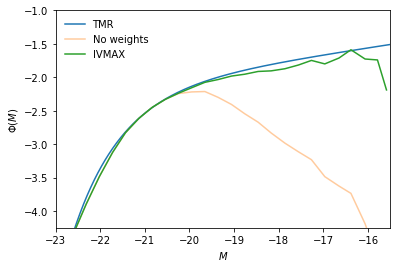

In [23]:
Ms = np.arange(-23., -15., 0.01)
sc = named_schechter(Ms, named_type='TMR')

pl.plot(Ms, np.log10(sc), label='TMR')

pl.plot(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_N']), label='No weights', alpha=0.4)
pl.plot(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_IVMAX']), label='IVMAX')

pl.xlabel(r'$M$')
pl.ylabel(r'$\Phi(M)$')

pl.ylim(-4.25, -1.)
pl.xlim(-23., -15.5)

pl.legend(frameon=False, loc=2)

In [2]:
root = '/global/cscratch1/sd/mjwilson/norberg/GAMA4/cobaya/'

In [3]:
dat = Table.read(root + 'schechter_chain.1.txt', format='ascii')        

In [4]:
samples = np.c_[dat['log10phistar'], dat['Mstar'], dat['alpha']]

In [5]:
samples = MCSamples(samples=samples, names=['log10phistar', 'Mstar', 'alpha'], labels=['log10phistar', 'Mstar', 'alpha'])

Removed no burn in


In [6]:
tmr_ref = {'log10phistar': -2.01, 'Mstar': -20.89, 'alpha': -1.25}

In [7]:
g = plots.get_subplot_plotter()

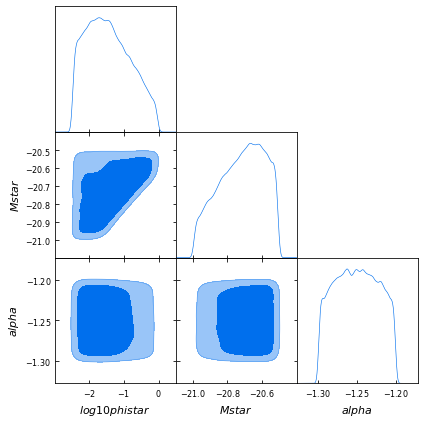

In [8]:
g.triangle_plot([samples], filled=True)        

# Done.